In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle


In [2]:
class Node:
  def __init__(self,X,Y,name,district,docks,id):
    self.X = X
    self.Y = Y
    self.name = name
    self.district = district
    self.docks = docks
    self.ID = id
  
  def nodePrint(self):
    print("Name - ",self.name)
    print("(X,Y) - (",self.X,",",self.Y,")")
    print("Docks - ",self.docks)
    print("ID - ",self.ID)


class Graph:
  def __init__(self,num):
    self.numVertices = num
    self.graph = [[0 for i in range(num)] for j in range(num)]      #Create a 2D matrix with all 0s of size num
    self.vertices = []
  
  def NeighboursOf(self,vert):
    neighbours = []
    for i in range(self.numVertices):
      if self.graph[vert][i]!=0:
        neighbours.append(i)
    return neighbours

In [5]:
# Loading the graph.
# Need to run the cells where the two classes are defined first
f = open("Graph g.pkl","rb")
G = pickle.load(f)
f.close()
print(len(G.vertices))

# Read the dataframe
df = pd.read_pickle("Dataframe.pkl")
print(df.shape)

245
(245, 5)


In [6]:
np.array(G.graph).shape

(245, 245)

In [7]:
type(G.vertices[0])

__main__.Node

In [8]:
len(G.graph)

245

In [9]:
G.vertices[0].nodePrint()

Name -  175 N Harvard St
(X,Y) - ( -7918062.31703125 , 5215631.0608375 )
Docks -  18
ID -  0


In [21]:
print(G.NeighboursOf(0))

[17, 33, 43, 44, 72, 91, 99, 112, 124, 134, 164, 173, 199, 201, 202, 239, 240, 243]


In [11]:
# References
# https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm
# https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/
# https://www.udacity.com/blog/2021/10/implementing-dijkstras-algorithm-in-python.html


def Djikstras(graph,source=0,target=10,groupSize=1):
  distanceToSrc = [float('inf')]*graph.numVertices
  distanceToSrc[source] = 0
  visited = [False]*graph.numVertices
  prev = {}
  for i in range(graph.numVertices):
    
    temp = float('inf')
    for j in range(graph.numVertices):
      if distanceToSrc[j] < temp and visited[j] == False and graph.vertices[j].docks>=groupSize:    #This last condition is the condition we need to check for group size
        temp = distanceToSrc[j]
        minIndex = j
    if 'minIndex' not in locals():
      print("Cannot reach with given group size")
      return None,None,None
    visited[minIndex] = True
    for y in range(graph.numVertices):
      if graph.graph[minIndex][y]>0 and visited[y]==False:
        if distanceToSrc[y]>distanceToSrc[minIndex]+graph.graph[minIndex][y]:
          distanceToSrc[y] = distanceToSrc[minIndex]+graph.graph[minIndex][y]
          prev[y] = minIndex
  

  path = []
  vertex = target
  while vertex!=source:
    path.append(vertex)
    vertex = prev[vertex]
  path.append(vertex)
  return distanceToSrc, prev, list(reversed(path))


In [12]:
def drawGraph(G,path):
  plt.figure(figsize=(24,15))
  x = []
  y = []
  name = []
  for i in range(G.numVertices):
    x.append(G.vertices[i].X)
    y.append(G.vertices[i].Y)
    name.append(G.vertices[i].name)
  plt.scatter(x,y)
  pX = []
  pY = []
  pName = []
  for i in path:
    pX.append(G.vertices[i].X)
    pY.append(G.vertices[i].Y)
    pName.append(G.vertices[i].name)

  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(str(path))
  for i in range(len(pX)):
    if i==len(pX)-1:
      plt.text(pX[i],pY[i],pName[i],color="green",fontsize='xx-large')
    elif i==0:
      plt.text(pX[i],pY[i],pName[i],color="red",fontsize='xx-large')
    else:
      plt.text(pX[i],pY[i],pName[i],fontsize='xx-large')
  plt.plot(pX,pY)

[0, 199, 242, 60, 61, 196, 6]
[0, 173, 242, 78, 106, 189, 70, 6]
Cannot reach with given group size
None


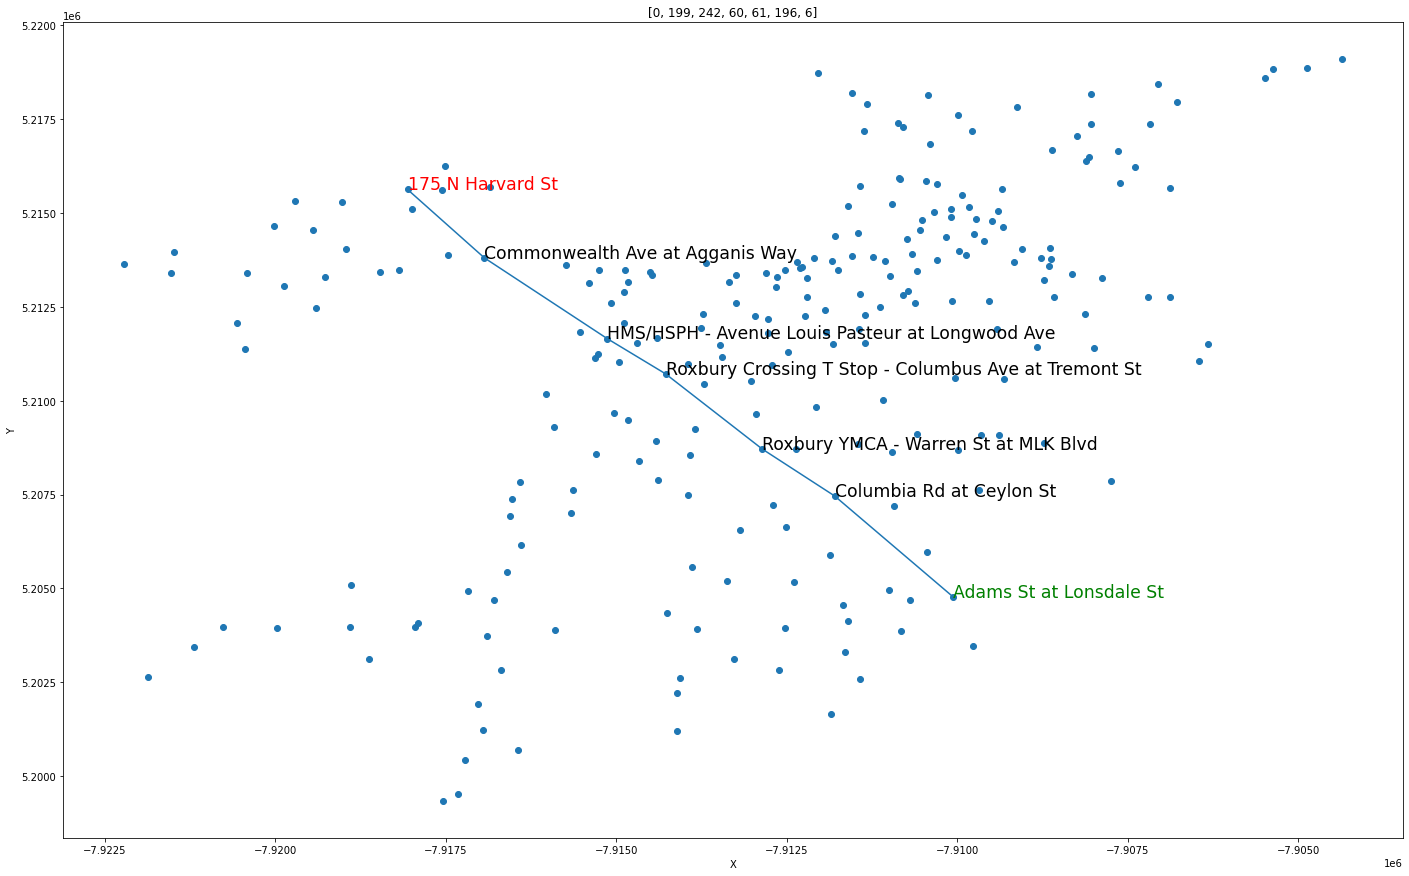

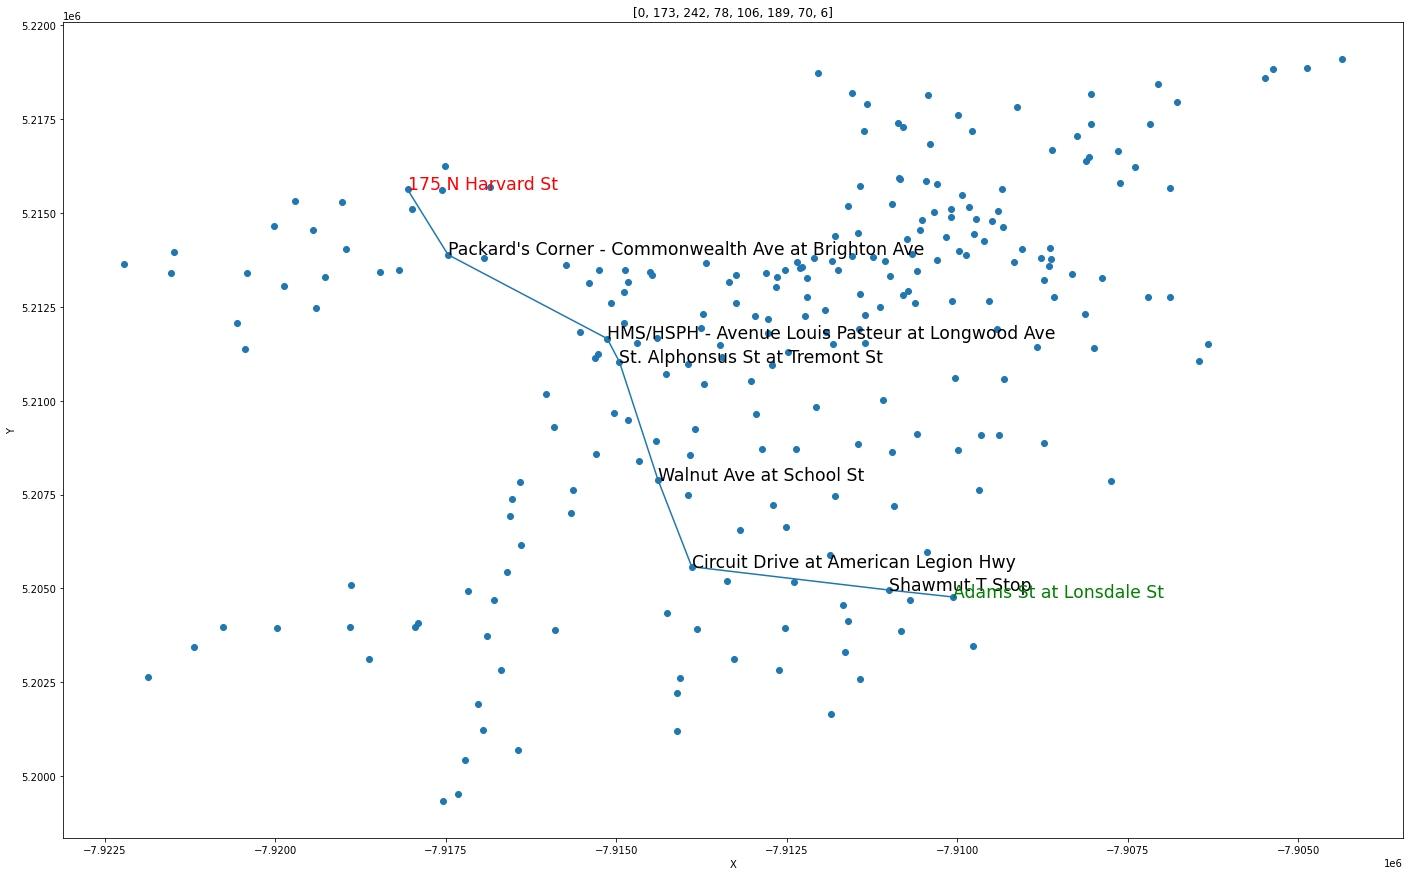

In [13]:

# Path with no specified group size ie single person
di,pr,path = Djikstras(G,0,6)
print(path)
# path = reversed(path)
if path:
  drawGraph(G,path)

# Alternate path
di, pr, path = Djikstras(G,0,6,17)
print(path)
if path:
  drawGraph(G,path)

# Too large a group
di, pr, path = Djikstras(G,0,6,20)
print(path)
if path:
  drawGraph(G,path)


[0, 199, 242, 60, 61, 196, 6]


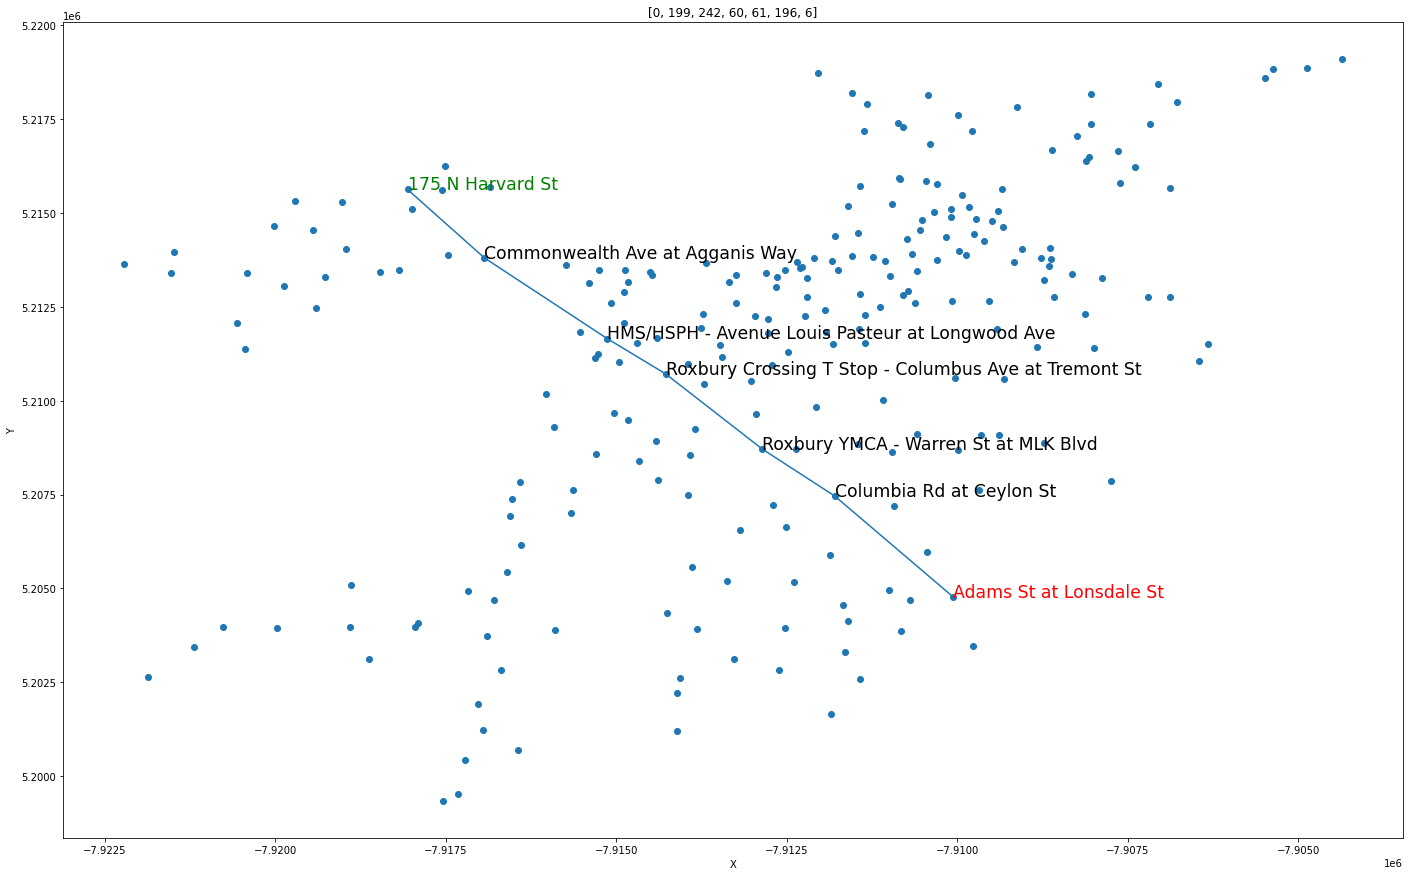

In [14]:

di,pr,path = Djikstras(G,0,6)
# Path with no specified group size ie single person
print(path)

plt.figure(figsize=(24,15))
x = []
y = []
name = []
for i in range(G.numVertices):
  x.append(G.vertices[i].X)
  y.append(G.vertices[i].Y)
  name.append(G.vertices[i].name)
plt.scatter(x,y)
pX = []
pY = []
pName = []
for i in reversed(path):
  pX.append(G.vertices[i].X)
  pY.append(G.vertices[i].Y)
  pName.append(G.vertices[i].name)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(str(path))
for i in range(len(pX)):
  if i==len(pX)-1:
    plt.text(pX[i],pY[i],pName[i],color="green",fontsize='xx-large')
  elif i==0:
    plt.text(pX[i],pY[i],pName[i],color="red",fontsize='xx-large')
  else:
    plt.text(pX[i],pY[i],pName[i],fontsize='xx-large')
plt.plot(pX,pY)


In [15]:
stationNames = list(df['Name'])

In [16]:
print(len(stationNames))

245


In [17]:
stationNames

['175 N Harvard St',
 '2 Hummingbird Lane at Olmsted Green',
 '555 Metropolitan Ave',
 '606 American Legion Hwy at Canterbury St',
 '645 Summer St',
 '700 Commonwealth Ave.',
 'Adams St at Lonsdale St',
 'Addison St at Saratoga St',
 'Airport T Stop - Bremen St at Brooks St',
 'Albany St at E. Brookline St',
 'American Legion Hwy at Cummins Hwy',
 'American Legion Hwy at Hyde Park Ave',
 'Andrew T Stop - Dorchester Ave at Dexter St',
 'Aquarium T Stop - 200 Atlantic Ave',
 'Arch St at Franklin St',
 'Archdale Rd at Washington St',
 'Ashmont T Stop',
 'B.U. Central - 725 Comm. Ave.',
 'Back Bay T Stop - Dartmouth St at Stuart St',
 'Bartlett St at John Elliot Sq',
 'Beacon St at Charles St',
 'Beacon St at Massachusetts Ave',
 'Belgrade Ave at Walworth St',
 'Bellevue T Stop',
 'Bennington St at Byron St',
 'Bennington St at Constitution Beach',
 'Blossom St at Charles St',
 'Blue Hill Ave at Almont St',
 'Blue Hill Ave at Havelock St',
 'Blue Hill Ave at Southwood St',
 'Boston City Ha

In [18]:
def findPath(graph,df,source=0,target=10,groupSize=1):
  sr = df[df['Name'].str.contains(source,case=False)].index
  # print(sr)
  src = sr[0]
  if len(sr)>1:
    # print("Choose source - ")
    for i in range(len(sr)):
      print(i," - ", name[sr[i]])
    src = int(input("Choose source - "))
    print(sr[src])
  # src = df[df['Name']==sr[src]].index
    src = sr[src]
  # print(src)

  tr = df[df['Name'].str.contains(target,case=False)].index
  trg = tr[0]
  if len(tr)>1:
    # print("Choose target - ")
    for i in range(len(tr)):
      print(i," - ", name[tr[i]])
    trg = int(input("Choose target - "))
  # trg = df[df['Name']==tr[trg]].index
    trg = tr[trg]
  # print(trg)

  di, pr, path = Djikstras(graph,src,trg,groupSize)
  if path:
    drawGraph(graph,path)

0  -  175 N Harvard St
1  -  Harvard Stadium: N. Harvard St at Soldiers Field Rd
Choose source - 0
0
0  -  Adams St at Lonsdale St
1  -  Gallivan Blvd at Adams St
Choose target - 0


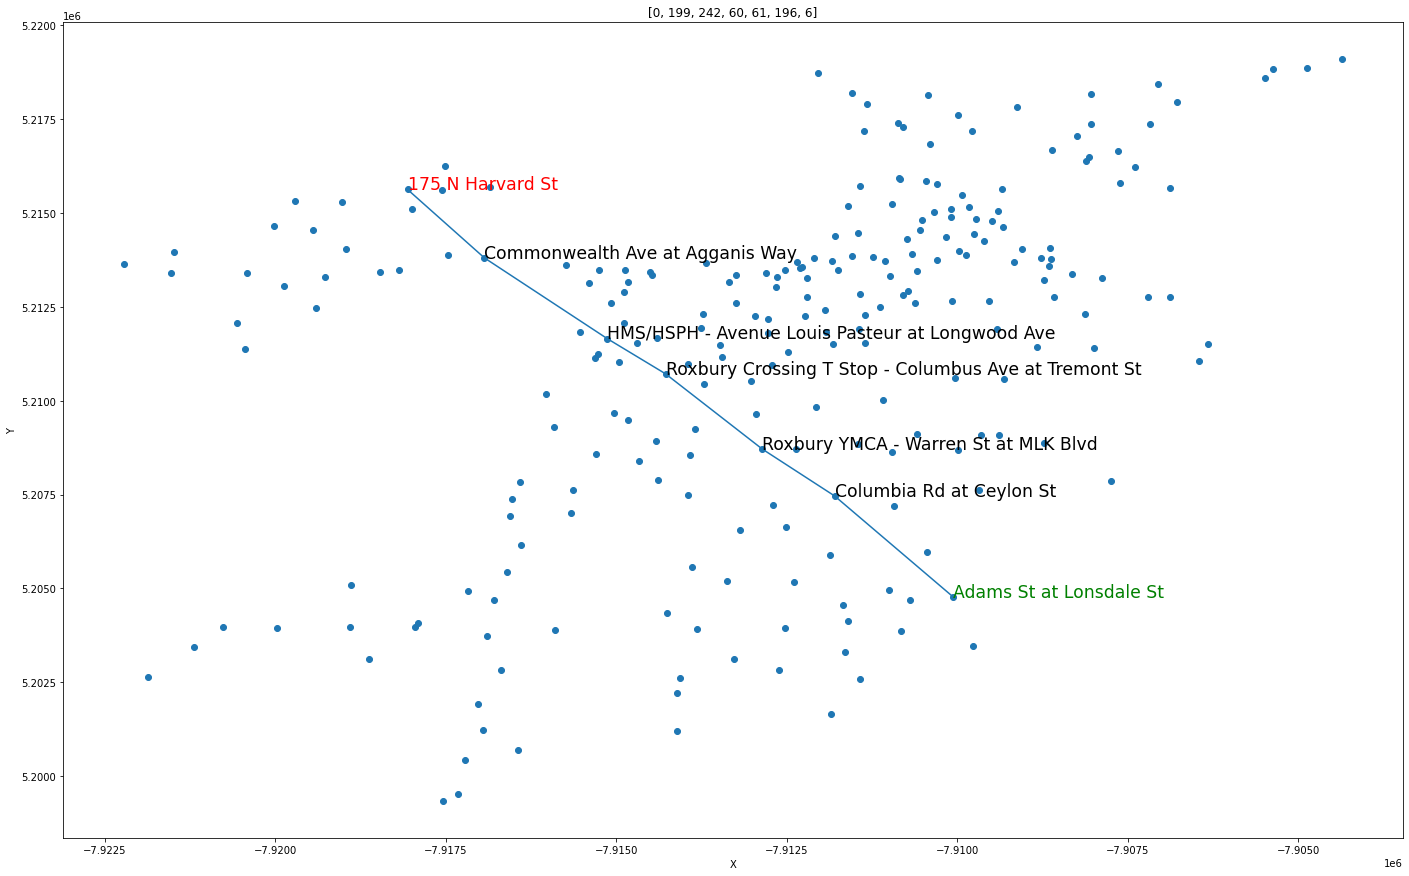

In [19]:
# You can modify the source and target here to get different paths.
# Choose a part of a station name from the list above. The program will give you a choice of stations to select from
# which contain that substring of station name
src = "Harvard St"
trg = "Adams st"
groupSize = 9

findPath(G,df,src,trg,groupSize)

0  -  175 N Harvard St
1  -  Harvard Ave at Brainerd Rd
2  -  Harvard Stadium: N. Harvard St at Soldiers Field Rd
Choose source - 0
0
0  -  Adams St at Lonsdale St
1  -  Gallivan Blvd at Adams St
Choose target - 0


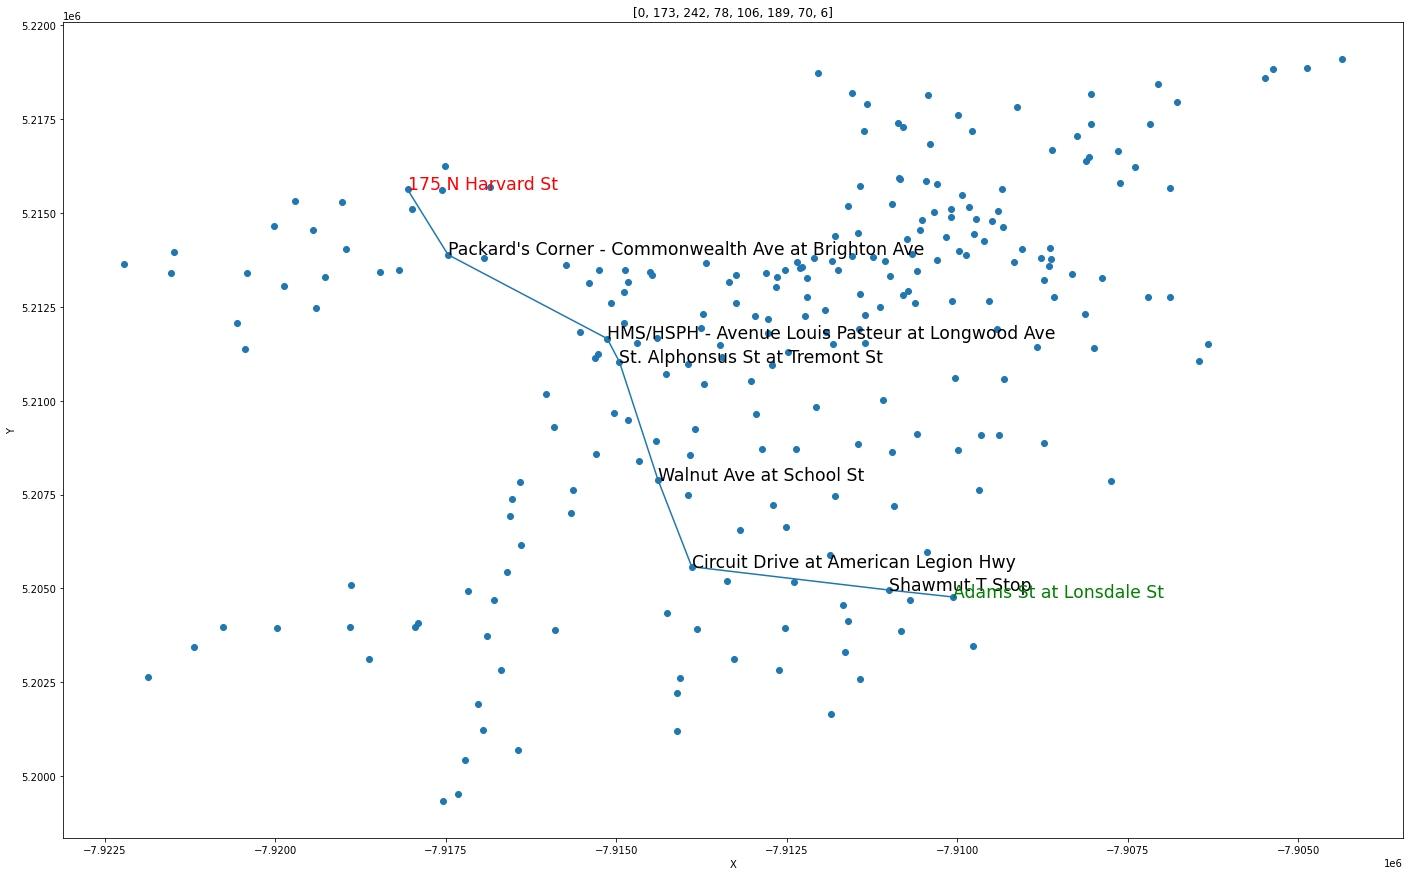

In [20]:
# You can modify the source and target here to get different paths.
# Choose a part of a station name from the list above. The program will give you a choice of stations to select from
# which contain that substring of station name
# We also modify the group size in this cell so that we can see Djikstra's suggest a different path
src = "Harvard"
trg = "Adams"
groupSize = 17

findPath(G,df,src,trg,groupSize)